# Moving To Richmond

In [37]:
##!conda install -c anaconda beautifulsoup4 -y
##!conda install -c anaconda lxml -y
##!conda install -c anaconda requests -y
##!conda config --add channels conda-forge
##!conda install -c conda-forge geopy --yes
##!conda install -c conda-forge folium=0.5.0 --yes
##  imports and functions
from project_lib import Project
from bs4 import BeautifulSoup
import requests
import lxml
import csv
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from geopy import distance
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML     
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import folium # plotting library
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
# import k-means from clustering stage
from sklearn.cluster import KMeans

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
RVA_Cities =['richmond, va','chesterfield, va', 'midlothian, va', 'henrico, va', 'glen allen, va', 'ashland, va','chmamberlayne, va', 'mechanicsville, va']
new_job_addr = '7100 Forest Ave 23226'
rva_gs = ['Grocery Store', 'Supermarket','Drugstore', 'Pharmacy', 'Market', 'Coffee Shop', 'Wine Shop','Gym / Fitness Center','Salon / Barbershop','Gym','Farmers Market', 'Food & Drink Shop', 'Performing Arts Venue','Museum', 'Theater','Art Museum','Dog Run','Social Club','State / Provincial Park', 'Lake']


In [2]:
zipfile = pd.read_csv("https://move-econresearch-prod.s3-us-west-2.amazonaws.com/listings/core/current_month/RDC_Inventory_Core_Metrics_Zip_Current.csv")

In [51]:
zip2 = zipfile[['postal_code','zip_name', 'median_listing_price','average_listing_price','new_listing_count','active_listing_count','total_listing_count','price_reduced_count','median_days_on_market']]
##zip2.head()
rva_df = zip2.loc[zip2['zip_name'].isin(RVA_Cities)]
rva_df.rename(columns={'postal_code': 'ZipCode'},inplace=True)
rva_df

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,ZipCode,zip_name,median_listing_price,average_listing_price,new_listing_count,active_listing_count,total_listing_count,price_reduced_count,median_days_on_market
228,23236,"richmond, va",292034.0,320525.0,52.0,96.0,192.0,28.0,44.5
318,23229,"henrico, va",372300.0,565452.0,44.0,58.0,135.0,36.0,33.0
1692,23228,"henrico, va",223050.0,213530.0,36.0,61.0,151.0,28.0,35.5
2052,23233,"henrico, va",400000.0,461825.0,36.0,71.0,145.0,28.0,43.5
2275,23116,"mechanicsville, va",381040.0,409562.0,44.0,168.0,342.0,52.0,57.5
2524,23238,"henrico, va",379550.0,538906.0,44.0,81.0,143.0,36.0,48.0
3471,23231,"henrico, va",264775.0,303743.0,36.0,99.0,227.0,20.0,56.5
3697,23222,"richmond, va",226050.0,245205.0,48.0,98.0,188.0,48.0,39.5
4304,23221,"richmond, va",487475.0,652035.0,16.0,31.0,58.0,16.0,47.0
5346,23005,"ashland, va",420050.0,459728.0,12.0,83.0,144.0,28.0,111.0


In [4]:
##Use geopy library to get the latitude and longitude values of new jobs address
geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(new_job_addr)
nja_latitude = location.latitude
nja_longitude = location.longitude
print('The geograpical coordinates of {} are {}, {}.'.format(new_job_addr, nja_latitude, nja_longitude))
print(location.raw['display_name'])

The geograpical coordinates of 7100 Forest Ave 23226 are 37.60536995, -77.5272805050902.
7100, Forest Avenue, Laurel, Crestview, Henrico County, Virginia, 23226, United States of America


In [5]:
coords = []
 
geolocator = Nominatim(user_agent="my-application")
for zipcode, city in zip(rva_df['ZipCode'],rva_df['zip_name'] ):
    location = geolocator.geocode({"postalcode": zipcode, "state": 'VA'})
    latitude2 = location.latitude
    longitude2 = location.longitude
    ##print(location)
    miles = distance.distance((nja_latitude,nja_longitude),(latitude2,longitude2)).mi
    #print(round(miles))
    coords.append((
        zipcode,
        latitude2,
        longitude2,
        miles,
        location.raw['display_name']))

In [6]:
# dconvert the list into a new DataFrame
coords_df = pd.DataFrame(coords)
#define the column names
coords_df.columns = ['ZipCode','Latitude', 'Longitude', 'Distance','display_name']

print(coords_df.shape)
coords_df.head()

(27, 5)


,ZipCode,Latitude,Longitude,Distance,display_name
0,23236,37.475795,-77.585330,9.487658,"Chesterfield County, Virginia, 23236, United S..."
1,23229,37.595856,-77.565052,2.173955,"Tuckahoe, Henrico County, Virginia, 23229, Uni..."
2,23228,37.624655,-77.494499,2.236781,"Lakeside, Henrico County, Virginia, 23228, Uni..."
3,23233,37.638190,-77.618639,5.499002,"Henrico County, Virginia, 23233, United States..."
4,23116,37.670332,-77.380369,9.219004,"Mechanicsville, Hanover County, Virginia, 2311..."


In [7]:
mylist = coords_df['display_name'].to_list()
cleaner = []
for row in mylist:
    x = row.split(',')
    cleaner.append((x.pop(0)))
coords_df['display_name'] = pd.Series(cleaner)
coords_df.head()

,ZipCode,Latitude,Longitude,Distance,display_name
0,23236,37.475795,-77.585330,9.487658,Chesterfield County
1,23229,37.595856,-77.565052,2.173955,Tuckahoe
2,23228,37.624655,-77.494499,2.236781,Lakeside
3,23233,37.638190,-77.618639,5.499002,Henrico County
4,23116,37.670332,-77.380369,9.219004,Mechanicsville


In [8]:
# create map
map_zip = folium.Map(location=[nja_latitude, nja_longitude], zoom_start=12)

label = '7100 Forest Ave 23226'
label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
    [nja_latitude, nja_longitude],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='#FDBB84',
    fill_opacity=0.7).add_to(map_zip)  

 
for lat, lng, zipcode, dispname in zip(coords_df['Latitude'], coords_df['Longitude'],coords_df['ZipCode'], coords_df['display_name']):
    label = '{}, {}'.format(dispname, zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_zip)        
map_zip

In [9]:
# The code was removed by Watson Studio for sharing.

In [10]:
##get the area info for goods and services
## Foursquare API required inputs
VERSION = '20180604'
LIMIT = 100
radius = 5000
venue_list = []

##loop thru and get info from 4square
for lat, lng, zipcode, dispname in zip(coords_df['Latitude'], coords_df['Longitude'],coords_df['ZipCode'], coords_df['display_name']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()

    items = results['response']['groups'][0]['items']
    ##print(items)
    ##break
    for venue in items:
        try:
            venue_list.append(( 
                zipcode,
                dispname, 
                venue['venue']['name'], 
                venue['venue']['location']['address'],
                venue['venue']['categories'][0]['name']))
        except:
            continue

In [11]:
# dconvert the venue list into a new DataFrame
venues_df = pd.DataFrame(venue_list)
#define the column names
venues_df.columns = ['ZipCode','Display_Name', 'VenueName', 'VenueAddress', 'Category']

print(venues_df.shape)


(2366, 5)


,ZipCode,Display_Name,VenueName,VenueAddress,Category
0,23236,Chesterfield County,iThaiz Restaurant,1108 Courthouse Rd Ste A,Thai Restaurant
1,23236,Chesterfield County,Cross Creek Florist & Gifts,501 Courthouse Rd,Flower Shop
2,23236,Chesterfield County,Your Store,740 Adkins Rd,Gas Station
3,23236,Chesterfield County,North End Juice Company,9101 Midlothian Turnkpike Suite 600,Juice Bar
4,23236,Chesterfield County,Rockwood Park,3401 Courthouse Rd,Park


In [12]:
print('There are {} uniques categories.'.format(len(venues_df['Category'].unique())))

There are 216 uniques categories.


In [13]:
##reduce the number of categories to the ones of interest
rva_ven = venues_df.loc[venues_df['Category'].isin(rva_gs)]
##rva_ven.head()

,ZipCode,Display_Name,VenueName,VenueAddress,Category
8,23236,Chesterfield County,Starbucks,9101 Midlothian Tpke,Coffee Shop
10,23236,Chesterfield County,Rite Aid,1104 Courthouse Rd,Drugstore
11,23236,Chesterfield County,Total Wine & More,10036 Robious Rd,Wine Shop
16,23236,Chesterfield County,Midlothian Athletic Club,10800 Center View Dr,Gym / Fitness Center
23,23236,Chesterfield County,The Fresh Market,"1200 Huguenot Rd,",Grocery Store
28,23236,Chesterfield County,Wegmans,12501 Stone Village Way,Supermarket
61,23236,Chesterfield County,Starbucks,11413A Midlothian Tpke,Coffee Shop
69,23236,Chesterfield County,RISE Sports Complex,2300 Oak Lake Blvd,Gym / Fitness Center
71,23236,Chesterfield County,Great Clips,"11607 Midlothian Tpke, Ste B",Salon / Barbershop
74,23236,Chesterfield County,Youfit Health Clubs,9923 Hull Street Rd,Gym


In [53]:
###group everything up and see what is where
rva_onehot = pd.get_dummies(rva_ven[['Category']], prefix="", prefix_sep="")

#print one hot totals
print( rva_onehot.sum(axis = 0, skipna = True))

# add zipcode and name column back to dataframe
 
rva_onehot['ZipCode'] = rva_ven['ZipCode'] 


#  zipcode and displayname column to the first column
fixed_columns = list(rva_onehot.columns[-2:]) + list(rva_onehot.columns[:-2])
rva_onehot = rva_onehot[fixed_columns]

print("OneHot Shape: {}".format(rva_onehot.shape))
rva_onehot.head()

rva_grouped = rva_onehot.groupby(['ZipCode']).sum().reset_index()

print("Grouped Shape: {}".format(rva_grouped.shape))
print(rva_grouped)

Art Museum                  3
Bank                        1
Coffee Shop                74
Dog Run                     4
Drugstore                  22
Farmers Market              9
Food & Drink Shop           3
Grocery Store              52
Gym                        38
Gym / Fitness Center       35
Lake                        1
Market                      7
Museum                      4
Performing Arts Venue       6
Pharmacy                   22
Salon / Barbershop         21
Social Club                 1
Sports Club                 3
State / Provincial Park     1
Supermarket                44
Theater                     3
Wine Shop                  15
dtype: int64
OneHot Shape: (369, 23)
Grouped Shape: (26, 23)
   ZipCode  Wine Shop  Art Museum  Bank  Coffee Shop  Dog Run  Drugstore  \
0    23005          1           0     0            2        0          1   
1    23059          0           0     1            4        0          1   
2    23060          1           0     0            

In [18]:
##of the venues of interest what are we most likely to find in the zipcodea

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['ZipCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
postcode_venues_sorted = pd.DataFrame(columns=columns)
postcode_venues_sorted['ZipCode'] = rva_grouped['ZipCode']

for ind in np.arange(rva_grouped.shape[0]):
    postcode_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rva_grouped.iloc[ind, :], num_top_venues)

postcode_venues_sorted

,ZipCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,23005,Coffee Shop,Grocery Store,Wine Shop,Supermarket,Salon / Barbershop
1,23059,Coffee Shop,Grocery Store,Supermarket,Lake,Gym
2,23060,Coffee Shop,Supermarket,Grocery Store,Wine Shop,Gym
3,23111,Supermarket,Coffee Shop,Gym,Gym / Fitness Center,Salon / Barbershop
4,23112,Coffee Shop,Gym / Fitness Center,Grocery Store,Gym,Supermarket
5,23113,Coffee Shop,Gym,Gym / Fitness Center,Supermarket,Salon / Barbershop
6,23114,Coffee Shop,Grocery Store,Supermarket,Pharmacy,Gym / Fitness Center
7,23116,Supermarket,Salon / Barbershop,Gym,Gym / Fitness Center,Coffee Shop
8,23220,Coffee Shop,Gym,Performing Arts Venue,Art Museum,Food & Drink Shop
9,23221,Coffee Shop,Grocery Store,Art Museum,Gym,Dog Run


In [19]:
## compare to most common place of all places
rva_onehot2 = pd.get_dummies(venues_df[['Category']], prefix="", prefix_sep="")

# add zipcode and displayname column back to dataframe
 
rva_onehot2['ZipCode'] = venues_df['ZipCode'] 
rva_onehot2['Display_Name'] = venues_df['Display_Name']

#  zipcode and displayname column to the first column
fixed_columns = list(rva_onehot2.columns[-2:]) + list(rva_onehot2.columns[:-2])
rva_onehot2 = rva_onehot2[fixed_columns]

print(rva_onehot2.shape)
rva_onehot2.head()

rva_grouped2 = rva_onehot2.groupby(['ZipCode']).sum().reset_index()

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['ZipCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
postcode_venues_sorted = pd.DataFrame(columns=columns)
postcode_venues_sorted['ZipCode'] = rva_grouped2['ZipCode']

for ind in np.arange(rva_grouped2.shape[0]):
    postcode_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rva_grouped2.iloc[ind, :], num_top_venues)

postcode_venues_sorted

(2366, 218)


,ZipCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,23005,Fast Food Restaurant,Pizza Place,Gas Station,Hotel,Sandwich Place
1,23059,Hotel,Mexican Restaurant,American Restaurant,Convenience Store,Pizza Place
2,23060,Mexican Restaurant,Sandwich Place,Pizza Place,Park,Italian Restaurant
3,23111,Mexican Restaurant,Italian Restaurant,Sandwich Place,American Restaurant,Convenience Store
4,23112,Mexican Restaurant,American Restaurant,Italian Restaurant,Coffee Shop,Chinese Restaurant
5,23113,Coffee Shop,Mexican Restaurant,Clothing Store,Fast Food Restaurant,Golf Course
6,23114,Clothing Store,Pizza Place,American Restaurant,Mexican Restaurant,Video Store
7,23116,Supermarket,Italian Restaurant,Convenience Store,Gym,Sandwich Place
8,23220,American Restaurant,Pizza Place,Hotel,Coffee Shop,Brewery
9,23221,American Restaurant,Pizza Place,Brewery,Coffee Shop,Sushi Restaurant


In [36]:
#Now lets look at the real estate 
rva_df.corr()

,median_listing_price,average_listing_price,new_listing_count,active_listing_count,total_listing_count,price_reduced_count,median_days_on_market
median_listing_price,1.000000,0.905976,0.066953,0.256128,0.118183,0.104211,0.323588
average_listing_price,0.905976,1.000000,-0.011382,0.041027,-0.084655,-0.068321,0.120686
new_listing_count,0.066953,-0.011382,1.000000,0.814206,0.822549,0.699459,-0.210457
active_listing_count,0.256128,0.041027,0.814206,1.000000,0.973534,0.735579,0.266016
total_listing_count,0.118183,-0.084655,0.822549,0.973534,1.000000,0.694455,0.186218
price_reduced_count,0.104211,-0.068321,0.699459,0.735579,0.694455,1.000000,0.029009
median_days_on_market,0.323588,0.120686,-0.210457,0.266016,0.186218,0.029009,1.000000


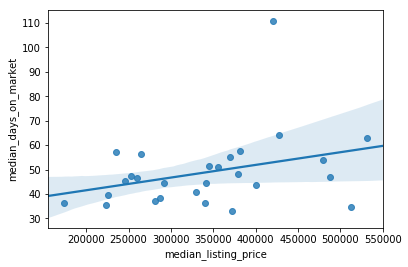

In [31]:
sns.regplot(x="median_listing_price", y="median_days_on_market", data=rva_df)

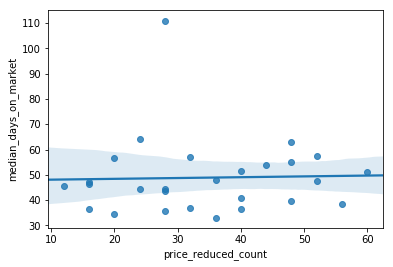

In [32]:
sns.regplot(x="price_reduced_count", y="median_days_on_market", data=rva_df)

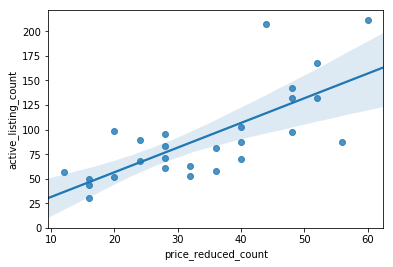

In [34]:
sns.regplot(x="price_reduced_count", y="active_listing_count", data=rva_df)

In [64]:
rva_merged = pd.merge(rva_df, rva_grouped, how='left',
        on='ZipCode', validate="1:1")
rva_merged.head()
##write results to csv to import into excel or other uses for later
project.save_data(file_name = "merged_data.csv",data = rva_merged.to_csv(index=False))


In [56]:
rva_merged.corr()

,median_listing_price,average_listing_price,new_listing_count,active_listing_count,total_listing_count,price_reduced_count,median_days_on_market,Wine Shop,Art Museum,Bank,...,Market,Museum,Performing Arts Venue,Pharmacy,Salon / Barbershop,Social Club,Sports Club,State / Provincial Park,Supermarket,Theater
median_listing_price,1.000000,0.905976,0.066953,0.256128,0.118183,0.104211,0.323588,0.064537,0.124617,0.303864,...,-0.060895,-0.050887,-0.250643,-0.230688,0.452659,-0.167222,-0.048117,0.067758,-1.222453e-01,-0.240920
average_listing_price,0.905976,1.000000,-0.011382,0.041027,-0.084655,-0.068321,0.120686,0.248977,0.229380,0.178776,...,0.054727,0.081523,-0.124740,-0.208841,0.383895,-0.142745,-0.096036,-0.058859,-2.130622e-01,-0.104311
new_listing_count,0.066953,-0.011382,1.000000,0.814206,0.822549,0.699459,-0.210457,-0.145856,-0.256721,0.476463,...,-0.240751,-0.047557,0.134268,-0.307716,-0.048049,-0.265891,0.273907,0.151683,-3.477211e-02,-0.145010
active_listing_count,0.256128,0.041027,0.814206,1.000000,0.973534,0.735579,0.266016,-0.355526,-0.325466,0.493932,...,-0.363390,-0.093885,0.053512,-0.324936,0.096505,-0.208984,0.258576,0.213628,4.799944e-02,-0.174913
total_listing_count,0.118183,-0.084655,0.822549,0.973534,1.000000,0.694455,0.186218,-0.373554,-0.359021,0.506388,...,-0.381156,-0.169682,-0.006646,-0.248614,0.061425,-0.173954,0.234167,0.230635,1.617723e-01,-0.198480
price_reduced_count,0.104211,-0.068321,0.699459,0.735579,0.694455,1.000000,0.029009,-0.127077,-0.285083,0.139568,...,-0.143825,0.012195,0.180415,-0.154964,0.097012,-0.276847,0.216222,0.199055,-1.370511e-01,-0.141853
median_days_on_market,0.323588,0.120686,-0.210457,0.266016,0.186218,0.029009,1.000000,-0.252081,-0.132405,0.076769,...,-0.247147,-0.104982,-0.108134,-0.008753,0.124557,-0.024039,-0.067681,0.090210,6.986055e-02,-0.116224
Wine Shop,0.064537,0.248977,-0.145856,-0.355526,-0.373554,-0.127077,-0.252081,1.000000,-0.262781,-0.145521,...,0.181882,-0.175810,-0.110952,0.211471,0.069058,0.106716,-0.110952,-0.145521,-1.540308e-01,0.040877
Art Museum,0.124617,0.229380,-0.256721,-0.325466,-0.359021,-0.285083,-0.132405,-0.262781,1.000000,-0.072232,...,0.504504,0.513327,0.246377,-0.309277,-0.081969,-0.072232,-0.130435,-0.072232,-4.604693e-01,0.246377
Bank,0.303864,0.178776,0.476463,0.493932,0.506388,0.139568,0.076769,-0.145521,-0.072232,1.000000,...,-0.102930,-0.085280,-0.072232,0.031140,0.061898,-0.040000,-0.072232,-0.040000,5.773503e-02,-0.072232


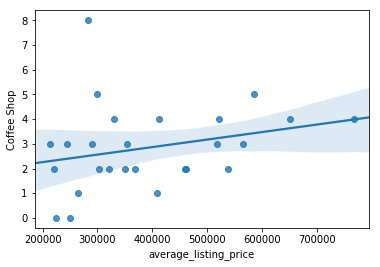

In [61]:
sns.regplot(x="average_listing_price", y="Coffee Shop", data=rva_merged)